In [172]:
################################################################################
# CS 224W (Fall 201) - HW1
# Starter code for Problem 1
# Author: praty@stanford.edu
# Last Updated: Sep 28, 2017
################################################################################

import snap
import numpy as np
import matplotlib.pyplot as plt

# Setup
erdosRenyi = None
smallWorld = None
collabNet = None

SUCCESS = -1
FAILURE = -2

Rnd = snap.TRnd(42)
Rnd.Randomize()

In [173]:
# Problem 1.1
def genErdosRenyi(N=5242, E=14484):
    """
    :param - N: number of nodes
    :param - E: number of edges

    return type: snap.PUNGraph
    return: Erdos-Renyi graph with N nodes and E edges
    """
    ############################################################################
    # TODO: Your code here!
    assert N >= 0 and E >= 0
    Graph = snap.TUNGraph.New(N, E)
    # Verify the requested number of edges is reasonable, otherwise we
    # could run into an infinite loop.
    assert(N*(N-1)/2 >= E)
    nodes = [Graph.AddNode(node) for node in xrange(N)]
    edges = 0
    while edges < E:
        srcID = Graph.GetRndNId(Rnd)
        dstID = Graph.GetRndNId(Rnd)
        if srcID != dstID and Graph.AddEdge(srcID, dstID) == SUCCESS:
            edges += 1
    ############################################################################
    return Graph

In [174]:
def genCircle(N=5242):
    """
    :param - N: number of nodes

    return type: snap.PUNGraph
    return: Circle graph with N nodes and N edges. Imagine the nodes form a
        circle and each node is connected to its two direct neighbors.
    """
    ############################################################################
    # TODO: Your code here!
    # Given the above definition, we assume that:
    # N = 1 -> we have a single node with a self-loop
    # N = 2 -> We have two nodes with a single edge between them
    #          (rather than 2).
    assert N >= 0
    Graph = snap.TUNGraph.New(N, N)
    for node in xrange(N):
        Graph.AddNode(node)    
    for node in xrange(N):
        Graph.AddEdge(node, (node + 1) % N)
    assert Graph.GetEdges() == N
    ############################################################################
    return Graph

In [175]:
def connectNbrOfNbr(Graph, N=5242):
    """
    :param - Graph: snap.PUNGraph object representing a circle graph on N nodes
    :param - N: number of nodes

    return type: snap.PUNGraph
    return: Graph object with additional N edges added by connecting each node
        to the neighbors of its neighbors
    """
    ############################################################################
    # TODO: Your code here!
    # Modifications to the graph happen in place, so collect a list of
    # new edges to add. We do not assume any particular ordering of the
    # nodes.
    newEdges = []
    for node in Graph.Nodes():
        src = node.GetId()
        # Each node in a circle graph should have 2 neighbors.
        neighbors = [Graph.GetNI(node.GetNbrNId(i))
                    for i in xrange(node.GetDeg())]
        assert len(neighbors) == 2
        for neighbor in neighbors:
            assert neighbor.GetDeg() == 2
            candidateDest = [neighbor.GetNbrNId(i)
                             for i in xrange(neighbor.GetDeg())
                             if neighbor.GetNbrNId(i) != src]
            # Only one more edge should be added.
            assert len(candidateDest) == 1
            # Invarian is lower value always points to larger value.
            dst = candidateDest[0]
            newEdges.append((min(src, dst), max(src, dst)))
    
    # Clear duplicates.
    newEdges = list(set(newEdges))
    assert len(newEdges) == N
    for (srcID, dstID) in newEdges:
        Graph.AddEdge(srcID, dstID)
        
    assert Graph.GetNodes() == N
    assert Graph.GetEdges() == 2*N
    ############################################################################
    return Graph

In [176]:
def connectRandomNodes(Graph, M=4000):
    """
    :param - Graph: snap.PUNGraph object representing an undirected graph
    :param - M: number of edges to be added

    return type: snap.PUNGraph
    return: Graph object with additional M edges added by connecting M randomly
        selected pairs of nodes not already connected.
    """
    ############################################################################
    # TODO: Your code here!
    E = Graph.GetEdges()
    N = Graph.GetNodes()
    assert (N * (N - 1) / 2 - E) >= M
    edges = 0
    while edges < M:
        srcID = Graph.GetRndNId(Rnd)
        dstID = Graph.GetRndNId(Rnd)
        if srcID != dstID and Graph.AddEdge(srcID, dstID) == SUCCESS:
            edges += 1
        
    assert Graph.GetNodes() == N
    assert Graph.GetEdges() == (E + M)
    
    ############################################################################
    return Graph

In [177]:
def genSmallWorld(N=5242, E=14484):
    """
    :param - N: number of nodes
    :param - E: number of edges

    return type: snap.PUNGraph
    return: Small-World graph with N nodes and E edges
    """
    Graph = genCircle(N)
    Graph = connectNbrOfNbr(Graph, N)
    Graph = connectRandomNodes(Graph, 4000)
    return Graph

In [178]:
def loadCollabNet(path):
    """
    :param - path: path to edge list file

    return type: snap.PUNGraph
    return: Graph loaded from edge list at `path` and self edges removed

    Do not forget to remove the self edges!
    """
    ############################################################################
    # TODO: Your code here!
    Graph = snap.LoadEdgeList(snap.PUNGraph, path, 0, 1, "\t")
    for node in Graph.Nodes():
        Graph.DelEdge(node.GetId(), node.GetId())
    assert Graph.GetNodes() == 5242
    assert Graph.GetEdges() == 14484
    ############################################################################
    return Graph

In [179]:
def getDataPointsToPlot(Graph):
    """
    :param - Graph: snap.PUNGraph object representing an undirected graph
    
    return values:
    X: list of degrees
    Y: list of frequencies: Y[i] = fraction of nodes with degree X[i]
    """
    ############################################################################
    # TODO: Your code here!
    degreeDistribution = snap.TIntPrV()
    snap.GetDegCnt(Graph, degreeDistribution)
    N = float(Graph.GetNodes())
    X, Y = [], []
    for item in degreeDistribution:
        X.append(item.GetVal1())
        Y.append(float(item.GetVal2()) / N)
    ############################################################################
    return X, Y

In [186]:
def Q1_1():
    """
    Code for HW1 Q1.1
    """
    global erdosRenyi, smallWorld, collabNet
    erdosRenyi = genErdosRenyi(5242, 14484)
    smallWorld = genSmallWorld(5242, 14484)
    collabNet = loadCollabNet("data/ca-GrQc.txt")
    
    plt.close()
    x_erdosRenyi, y_erdosRenyi = getDataPointsToPlot(erdosRenyi)
    plt.loglog(x_erdosRenyi, y_erdosRenyi, color = 'y', label = 'Erdos Renyi Network')

    x_smallWorld, y_smallWorld = getDataPointsToPlot(smallWorld)
    plt.loglog(x_smallWorld, y_smallWorld, linestyle = 'dashed', color = 'r', label = 'Small World Network')

    x_collabNet, y_collabNet = getDataPointsToPlot(collabNet)
    plt.loglog(x_collabNet, y_collabNet, linestyle = 'dotted', color = 'b', label = 'Collaboration Network')
    
    plt.xlabel('Node Degree (log)')
    plt.ylabel('Proportion of Nodes with a Given Degree (log)')
    plt.title('Degree Distribution of Erdos Renyi, Small World, and Collaboration Networks')
    plt.legend()
    plt.savefig("output/erdo_small_collab_log_logdegree_distribution", dpi=600)
    plt.show()

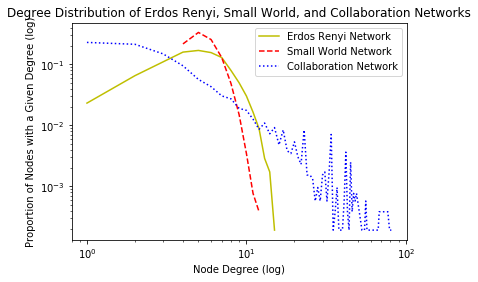

In [187]:
# Execute code for Q1.1
Q1_1()

In [192]:
# Problem 1.2

# Find max degree of all 3 graphs for plotting (add 2 for padding)
maxdeg = max([erdosRenyi.GetNI((snap.GetMxDegNId(erdosRenyi))).GetDeg(),
                smallWorld.GetNI((snap.GetMxDegNId(smallWorld))).GetDeg(),
                collabNet.GetNI((snap.GetMxDegNId(collabNet))).GetDeg()]) + 2

# Erdos Renyi
def calcQk(Graph, maxDeg=maxdeg):
    """
    :param Graph - snap.PUNGraph object representing an undirected graph
    :param maxDeg - maximum degree(+1) for which q_k needs to be calculated
    
    return type: np.array
    return: array q_k of dimension maxDeg representing the excess degree
        distribution  
    """
    ############################################################################
    # TODO: Your code here!
    degreeDistribution = snap.TIntPrV()
    snap.GetDegCnt(Graph, degreeDistribution)
    q_k_p = np.zeros(maxDeg)
    for item in degreeDistribution:
        degree = item.GetVal1()
        if (degree > 0):
            q_k_p[degree - 1] = degree * item.GetVal2()
    q_k = q_k_p / np.sum(q_k_p)
    ############################################################################
    return q_k

In [193]:
def calcExpectedDegree(Graph):
    """
    :param Graph - snap.PUNGraph object representing an undirected graph

    return type: float
    return: expected degree of Graph
    """
    ############################################################################
    # TODO: Your code here!
    ed = 0.0
    degreeDistribution = snap.TIntPrV()
    snap.GetDegCnt(Graph, degreeDistribution)
    N = float(Graph.GetNodes())
    for item in degreeDistribution:
        ed += float(item.GetVal1()) * float(item.GetVal2()) / N
    ############################################################################
    return ed

In [198]:
def calcExpectedExcessDegree(Graph, qk):
    """
    :param Graph - snap.PUNGraph object representing an undirected graph
    :param qk - np.array of dimension maxdeg representing excess degree
        distribution of `Graph

    return type: float
    return: expected excess degree of `Graph
    """
    ############################################################################
    # TODO: Your code here!
    eed = 0.0
    eed = np.average([i for i in xrange(len(qk))], weights=qk)
    ############################################################################
    return eed

In [201]:
def Q1_2_a():
    """
    Code for Q1.2a
    """
    qk_erdosRenyi = calcQk(erdosRenyi, maxdeg)
    qk_smallWorld = calcQk(smallWorld, maxdeg)
    qk_collabNet = calcQk(collabNet, maxdeg)

    plt.close()
    plt.loglog(range(maxdeg), qk_erdosRenyi, color = 'y', label = 'Erdos Renyi Network')
    plt.loglog(range(maxdeg), qk_smallWorld, linestyle = 'dashed', color = 'r', label = 'Small World Network')
    plt.loglog(range(maxdeg), qk_collabNet, linestyle = 'dotted', color = 'b', label = 'Collaboration Network')

    plt.xlabel('k Degree')
    plt.ylabel('Excess Degree Distribution')
    plt.title('Excess Degree Distribution of Erdos Renyi, Small World, and Collaboration Networks')
    plt.legend()
    plt.savefig("output/erdo_small_collab_log_log_excess_degree_distribution", dpi=600)
    plt.show()

    # Calculate Expected Degree
    ed_erdosRenyi = calcExpectedDegree(erdosRenyi)
    ed_smallWorld = calcExpectedDegree(smallWorld)
    ed_collabNet = calcExpectedDegree(collabNet)
    print 'Expected Degree for Erdos Renyi: %f' % ed_erdosRenyi
    print 'Expected Degree for Small World: %f' % ed_smallWorld
    print 'Expected Degree for Collaboration Network: %f' % ed_collabNet

    # Calculate Expected Excess Degree
    eed_erdosRenyi = calcExpectedExcessDegree(erdosRenyi, qk_erdosRenyi)
    eed_smallWorld = calcExpectedExcessDegree(smallWorld, qk_smallWorld)
    eed_collabNet = calcExpectedExcessDegree(collabNet, qk_collabNet)
    print 'Expected Excess Degree for Erdos Renyi: %f' % (eed_erdosRenyi)
    print 'Expected Excess Degree for Small World: %f' % (eed_smallWorld)
    print 'Expected Excess Degree for Collaboration Network: %f' % (eed_collabNet)

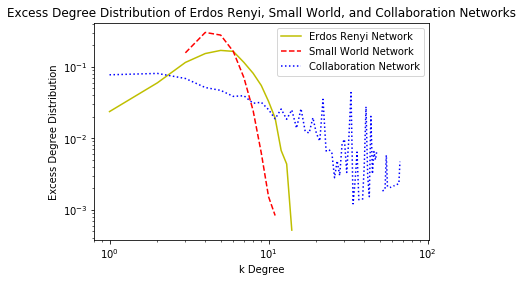

Expected Degree for Erdos Renyi: 5.526135
Expected Degree for Small World: 5.526135
Expected Degree for Collaboration Network: 5.526135
Expected Excess Degree for Erdos Renyi: 5.542323
Expected Excess Degree for Small World: 4.800400
Expected Excess Degree for Collaboration Network: 15.870409


In [202]:
# Execute code for Q1.2a
Q1_2_a()

In [214]:
# Problem 1.3 - Clustering Coefficient

def calcClusteringCoefficient(Graph):
    """
    :param - Graph: snap.PUNGraph object representing an undirected graph

    return type: float
    returns: clustering coeffient of `Graph 
    """    
    ############################################################################
    # TODO: Your code here!
    C = 0.0
    total = 0.0
    for node in Graph.Nodes():
        ki = node.GetDeg()
        numConnectedNeighbors = 0.0
        if ki >= 2:
            neighborIDs = [node.GetNbrNId(i)
                           for i in xrange(node.GetDeg())]
            for neighborID in neighborIDs:
                neighbor = Graph.GetNI(neighborID)
                candidates = [neighbor.GetNbrNId(i)
                              for i in xrange(neighbor.GetDeg())]
                for candidate in candidates:
                    if node.IsNbrNId(candidate):
                        numConnectedNeighbors += 1
                
            total += numConnectedNeighbors / (ki * (ki - 1))
        
    C = total / float(Graph.GetNodes())
    # Sanity check.
    assert abs(C - snap.GetClustCf(Graph)) < 1e-8
    ############################################################################
    return C

In [215]:
def Q1_3():
    """
    Code for Q1.3
    """
    C_erdosRenyi = calcClusteringCoefficient(erdosRenyi)
    C_smallWorld = calcClusteringCoefficient(smallWorld)
    C_collabNet = calcClusteringCoefficient(collabNet)
    
    print('Clustering Coefficient for Erdos Renyi Network: %f' % C_erdosRenyi)
    print('Clustering Coefficient for Small World Network: %f' % C_smallWorld)
    print('Clustering Coefficient for Collaboration Network: %f' % C_collabNet)

In [216]:
# Execute code for Q1.3
Q1_3()

Clustering Coefficient for Erdos Renyi Network: 0.001102
Clustering Coefficient for Small World Network: 0.284075
Clustering Coefficient for Collaboration Network: 0.529636
